#  Data Analysis Project: Analyzing climate statistics
### Programming Workshop for Beginners
### University of Waterloo, June 2018
author: Ivana Kajić 


## Introduction

This project is a continuation of the lecture [Python Workshop for Beginners: Data Analysis](http://uwpyb.github.io/materials/lectures/day_2.slides). 
In this project we will:

1. Load the temperature data into the memory of our computer

2. Analyze the data

3. Make nice plots that allow us to answer some questions about the data

The project is meant to be done at your own, individual pace. We want to encourage you to experiment with the code and try out different things. Trying out things also means breaking them! So, don't be afraid to break pieces of code and get errors. If you don't understand something or want to know more about some part of the code, ping a mentor and ask for an explanation. Sometimes, there are many different ways to do the same thing and we can help you think of alternative solutions.


## Workflow

Create a script **climate.py** in your **workshop** folder on your Desktop. Write your code there and every time you add new lines run the script in the IPython console:
```
run climate.py
```
Make sure that you are running your commands in IPython from the directory where your file is located, otherwise IPython will not be able to find that file. To go to the directory where the file is located type following lines in IPython:
```
cd
cd Desktop
cd workshop
```

## Data

We will be accessing the temperature data provided by the [World Bank’s Climate Change Knowledge Portal](http://data.worldbank.org/topic/climate-change). The portal provides historical precipitation and temperature data for a period of time starting from 1901 to 2012 for every country in the world. 

We will use yearly averages for Canada for this period which can be downloaded here:

Temperature: http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv

Go to the website, right click (**Save page as** or **Save as**) and save that file in the **workshop** folder. After you have downloaded the file, go to that folder and open the file in your editor (e.g. Sublime Text or Notepad) to take a look at it.

The first few lines should look something like this:
```
year,data
1901,-7.67241907119751
1902,-7.862711429595947
1903,-7.910782814025879
1904,-8.155729293823242
1905,-7.547311305999756

```

## 2. Converting the data into a NumPy array 

For this exercise we will use the NumPy package. Import the package by typing the following line in your **climate.py** script:

In [1]:
import numpy as np

We can use NumPy to load the data we have downloaded. In the lecture, we did this:
```python
chocolate = np.loadtxt('chocolate.csv', delimiter=',', skiprows=1)
```
Where `chocloate.csv` was a file stored on our computer (reminder: `delimiter=','`) told NumPy that the data in the file is separated by commas). We skip the first row that contains the labels and just focus on loading the numerical data.

Now, let's load the temperature data as an array of numbers.

In [2]:
data = np.loadtxt('CAN.csv', delimiter=',', skiprows=1)

Let's take a look at our data:

In [3]:
print(data)

[[1901.           -7.67241907]
 [1902.           -7.86271143]
 [1903.           -7.91078281]
 [1904.           -8.15572929]
 [1905.           -7.54731131]
 [1906.           -7.68410349]
 [1907.           -8.41355324]
 [1908.           -7.79092932]
 [1909.           -8.2393055 ]
 [1910.           -7.77461147]
 [1911.           -8.11444664]
 [1912.           -7.88540268]
 [1913.           -7.98794031]
 [1914.           -7.96593761]
 [1915.           -7.14403915]
 [1916.           -8.13297844]
 [1917.           -8.49991417]
 [1918.           -8.20466232]
 [1919.           -8.03598595]
 [1920.           -7.83067989]
 [1921.           -7.68577719]
 [1922.           -8.33498955]
 [1923.           -8.02212524]
 [1924.           -7.57456827]
 [1925.           -7.95162582]
 [1926.           -7.79278946]
 [1927.           -7.96172714]
 [1928.           -7.23797512]
 [1929.           -8.1236515 ]
 [1930.           -7.3023057 ]
 [1931.           -6.64633942]
 [1932.           -7.82168865]
 [1933. 

We notice the first column corresponds to years, the second to temperature averages. To find out how many rows there are, we can look at the shape of that array:

In [4]:
print(data.shape)

(112, 2)


The output of `data.shape` gives us two numbers, the first one is the number of rows and the second one is the number of columns in the array. Seems like we have yearly temperature averages for 112 years for Canada.

The round brackets stand for a data type called tuple, which is very similar to a list. An important difference that elements in tuples can't be changed, we can just access these values.

To access the first element and store it in a new variable:

In [5]:
nr_years = data.shape[0] # this gets the first element in the tuple

print("Number of years in temperatures:", nr_years)

Number of years in temperatures: 112


Let's take a look at the first row, corresponding to the average for the year 1901:

In [6]:
print("The first row", data[0])

The first row [1901.           -7.67241907]


To get the year in the first row we can specify the first column:

In [7]:
print("The first year:", data[0, 0])

The first year: 1901.0


Remember that the first number in `data[0,0]` refers to the row number (here that is zero) and the second number refers to the column number (also zero). If we wanted to get the first five rows we could do it in the following way:

In [8]:
data[0:5, 0:2] 

array([[1901.        ,   -7.67241907],
       [1902.        ,   -7.86271143],
       [1903.        ,   -7.91078281],
       [1904.        ,   -8.15572929],
       [1905.        ,   -7.54731131]])

The first `0:5` index can be read as "everything starting from beginning until the row 5", and the second `0:2` index as "everything starting from beginning until the column 2".

Notice that our array has two columns, so we could also say to Numpy "give me all columns" instead of "give me the column 0 and the column 1". Because we often want all columns or all rows, instead of specifying their number, we can use the colon symbol `:` that stands for "all columns" (if used as the second index) or "all rows" (if used as the first index):

In [9]:
data[0:5, :]

array([[1901.        ,   -7.67241907],
       [1902.        ,   -7.86271143],
       [1903.        ,   -7.91078281],
       [1904.        ,   -8.15572929],
       [1905.        ,   -7.54731131]])

**Exercise 1**: How would you get the temperature for the year 1901?

**Exercise 2**: What does the dot mean after each year, e.g., `1901.`?

To make things even more confusing, we can omit `0` if we mean "from the beginning":

In [10]:
data[:5, :]

array([[1901.        ,   -7.67241907],
       [1902.        ,   -7.86271143],
       [1903.        ,   -7.91078281],
       [1904.        ,   -8.15572929],
       [1905.        ,   -7.54731131]])

**Exercise 3**: If you made a typo and wrote `data[5:, :]`, how many rows and columns would you have seen?

Let's say we wanted to get all the years. That means we want to fetch everything in the first column (the column with index 0):

In [11]:
print("All years:", data[:, 0])

All years: [1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912.
 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924.
 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936.
 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948.
 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960.
 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972.
 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984.
 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996.
 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008.
 2009. 2010. 2011. 2012.]


Remember, the colon symbol **:** means "give me everything starting from the first row until the end".

We can store years in the separate variable, this will be useful later on:

In [19]:
years = data[:, 0]

**Exercise**: How would you get the first five years (without temperatures)?

### Moving around in NumPy arrays

**Exercise 4**: How would you get the all the temperatures?

**Exercise 5**: How would you get last five years? (Hint: use negative indexing)

**Exercise 6**: How would you get the temperature in the last row?


# 2. Data analysis

Let's take a closer look at our data. One interesting thing we might want to look at is the highest temperature in the period from 1901-2012. 

A very simple thing to do would be to use the `np.max` function with our array `data`:

In [20]:
print(np.max(data))

2012.0


2012 seems too hot, if that was the highest temperature we probably wouldn't be here right now. It's more likely this refers to the year -- 2012 is the largest number in our whole array, and we need a way to tell NumPy to look for the highest values among temperatures (not years!). Since our temperatures are stored in the second column, let's first extract temperatures only:

In [21]:
temperatures = data[:, 1]

In [22]:
temperatures

array([-7.67241907, -7.86271143, -7.91078281, -8.15572929, -7.54731131,
       -7.68410349, -8.41355324, -7.79092932, -8.2393055 , -7.77461147,
       -8.11444664, -7.88540268, -7.98794031, -7.96593761, -7.14403915,
       -8.13297844, -8.49991417, -8.20466232, -8.03598595, -7.83067989,
       -7.68577719, -8.33498955, -8.02212524, -7.57456827, -7.95162582,
       -7.79278946, -7.96172714, -7.23797512, -8.1236515 , -7.3023057 ,
       -6.64633942, -7.82168865, -8.69313431, -7.96432734, -8.16696739,
       -8.59422493, -7.33925343, -6.85634899, -7.66910791, -6.79938126,
       -7.23310471, -7.09781265, -7.22318792, -6.60394669, -7.64634562,
       -7.73950958, -7.1615243 , -7.65996933, -7.69635296, -8.5178299 ,
       -7.90392971, -6.68076992, -6.75395203, -7.33406448, -7.58600092,
       -8.27430534, -7.7633009 , -6.90325785, -7.87138367, -6.95103312,
       -7.94641209, -7.46536016, -7.36332846, -8.24113083, -8.07826996,
       -7.83267879, -7.97359228, -7.36812067, -7.03929138, -7.72

...and then ask for the minimum and the maximum:

In [23]:
max_temp = np.max(temperatures)
min_temp = np.min(temperatures)

In [24]:
print("Lowest average temperature in Canada over last 112 years was:", min_temp)
print("Highest average temperature in Canada over last 112 years was:", max_temp)

Lowest average temperature in Canada over last 112 years was: -9.525187492370605
Highest average temperature in Canada over last 112 years was: -4.703649520874023


**Exercise**: How would you find out the number of elements in the `temperatures` array? 

It would be neat to know what were the years with the lowest and highest temperatures.

To do this, we could again  print the array `data` on the screen and find these values in the second column and take a look at the year in the first column. This will take a long time since we might end up inspecting average temperatures for more than 100 years, and it's also tiring to stare at those numbers... instead, let's make Python do this for us. 

One way to start is to ask "when were temperatures equal to the lowest temperature". We could experiment with a for loop, and do something like this:

In [25]:
for index in range(len(temperatures)):
    if temperatures[index] == min_temp:
        print(years[index])

1972.0


But there is a better way to do this. We could directly compare every element in the array with a number:

In [26]:
temperatures == min_temp

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

This line will compare every entry of temperatures with the `min_temp` value. It will print `False` when those are not equal, and `True` otherwise. Now, you could try counting where that `True` is... But chances of making an error are high and it's very inefficient. Instead we can use `np.where` to tell us where the `True` value is:

In [27]:
min_year = np.where(temperatures == min_temp)

`np.where` will happily accept that array of booleans and look for the one where there is True. 
 
Let's take a look at the output stored in `min_year`:

In [30]:
print(min_year)
type(min_year)

(array([71]),)


tuple

Ok, so we see a number there which looks like it could be the index of a row that contains the lowest temperature and the corresponding year. But this number is wrapped in all sorts of symbols: there are parentheses `()` and the `array()`. Let's try to understand what this means: the outermost parentheses stand for a tuple, whose elements can be accessed like the elements of a list. This tuple contains only one element (`array([71])`) as after the comma `,` there is nothing.

So let's get that first element:

In [31]:
min_year_index = min_year[0]
print(min_year_index)

[71]


But the `[]` brackets in the output say we got a list (or maybe a numpy array, how to check this?), so again we need to access the first element:

In [32]:
min_year_index = min_year_index[0]
print(min_year_index)

71


Finally we have the index of a row which contains the year with the lowest temperature. It's the row 71 and we can fetch that element in our list of years:

In [34]:
years[min_year_index]

1972.0

The previous example with `np.where` tends to be confusing, so let's take a look at another example. Can you explain to yourself/your neighbor what would values in `hot_in_canada` mean?

In [36]:
hot_in_canada = np.where(temperatures > -6)
hot_in_canada

(array([ 80,  97,  98, 100, 104, 105, 109, 110, 111]),)

Finally, how can we find out how many years observed temperature averages above -6 degrees?

**Exercise 1**: Instead of getting the index in two lines:
```
min_year_index = min_year[0]
min_year_index = min_year_index[0]
```
how would you get the same index in just one line? 

**Exercise 2**: Get the row containing the year with the highest average temperatures!

**Exercise 3**: Get the average temperature for the whole period! (Hint: `np.mean()`)

Now we know how to get bits and pieces from an array of numbers. Often when dealing with numerical data, general trends are more apparent if we visualize the data. So let's take a closer look at what happened in the last 100 years with those temperatures!

# 3. Plotting the data

Plotting the data will allow us to see any trends in the temperature change over years. Did the average temperature decrease or increase, or maybe stayed the same? 

For plotting we are again going to use the `matplotlib` library, like we have done in the lecture.
First, let's create a script called `temperature_plots.py` and import the necessary tools:

In [37]:
import matplotlib.pyplot as plt
import numpy as np

Let's make a simple plot of temperature averages over all 111 years, remember to put your years on the x-axis (first parameter) and temperature values (second parameter) on the y-axis:

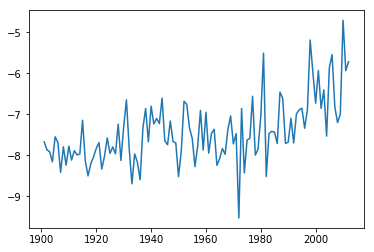

In [38]:
plt.figure()
plt.plot(years, temperatures)
plt.show()

There are certain things we can do to make this plot look more informative. First, let's put labels and the title:

<Figure size 432x288 with 0 Axes>

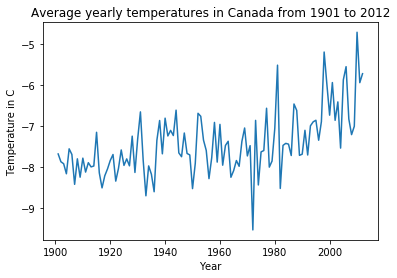

In [40]:
plt.figure()
plt.plot(years, temperatures)
plt.title("Average yearly temperatures in Canada from 1901 to 2012")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.show()

We can also get rid of the white space on the right by specifying the limits for our x-axis. This limit will say which years we want to plot. Remember that our x-axis represents years, so we can use `set_xlim` to show the data between 1901 and 2012:

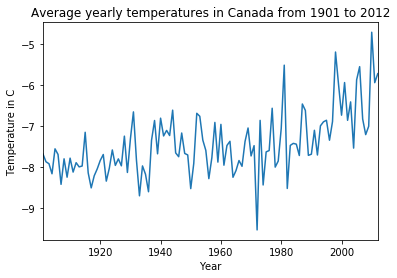

In [42]:
plt.figure()
plt.plot(years, temperatures)
plt.title("Average yearly temperatures in Canada from 1901 to 2012")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2012])
plt.show()

**Exercise**: Function `plot` lets you pick a color and the linewidth by specifying parameters `color` and `linewidth`. Pick a color and change the default linewidth to see what happens. Choose among following colors: blue, green, red, cyan, magenta, yellow, black, white (e.g. `color='cyan'`). If you want more colors, try looking up on Google what are other fancy options!

**Question**: Looking a this plot: how would you describe what happened with the average temperature over the last 10, 50  and 100 years?


# Additional exercises:

## 1. Comparing temperatures in different countries

We have seen how to do a simple plot using the data we have downloaded. Now, let's load temperature data from different countries and compare them.  In the examples below we will be using 'HRV' which stands for Hrvatska (Croatia) and is very difficult to pronounce if you don't speak a Slavic language, and 'DEU' for Deutschland (Germany). Visit [this page](http://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code) to find the three-letter country code of another country you can use in your own script. 

You can download the temperatures for Croatia here:

`http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/HRV.csv`


And for Germany here:

`http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/DEU.csv`

Again, you go to these websites and save the data in your `workshop` folder by right-clicking on the website and selecting "Save Page as".

To open the files use numpy as before:

In [44]:
temperatures_deu = np.loadtxt('DEU.csv', delimiter=',', skiprows=1)
temperatures_hrv = np.loadtxt('HRV.csv', delimiter=',', skiprows=1)

Let's plot both temperatures on one plot:

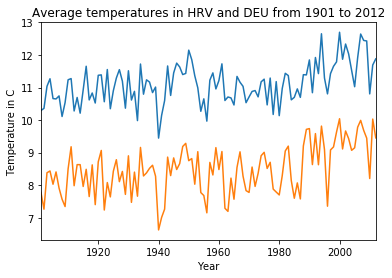

In [45]:
plt.figure()
plt.plot(temperatures_hrv[:, 0], temperatures_hrv[:, 1])
plt.plot(temperatures_deu[:, 0], temperatures_deu[:, 1])
plt.title("Average temperatures in HRV and DEU from 1901 to 2012")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2012])
plt.show()

Let's make this plot a bit easier to read by labelling the lines. For that we can pass the argument `label` to the function `plot` and then display a legend. By passing a parameter `loc` (for location), we can tell matplotlib to put the legend in what it estimates to be a best region of the plot:

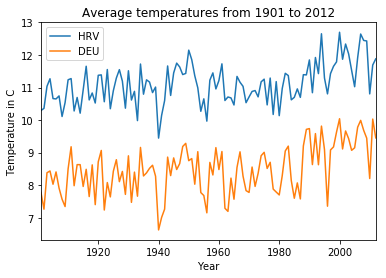

In [46]:
plt.figure()
plt.plot(temperatures_hrv[:, 0], temperatures_hrv[:, 1], label='HRV')
plt.plot(temperatures_deu[:, 0], temperatures_deu[:, 1], label='DEU')
plt.title("Average temperatures from 1901 to 2012")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2012])
plt.legend(loc='best')
plt.show()

**Question**: If you don't specify `loc` and just use `plt.legend()` where does matplotlib put the legend?

Let's do a few chages to our plot to make it look more interesting. Change both linewidths to `2` and chage their colors to red for Croatia and blue for Germany. Also, we can easily turn the grid on `plt.grid('on')` to compare the values more easily.

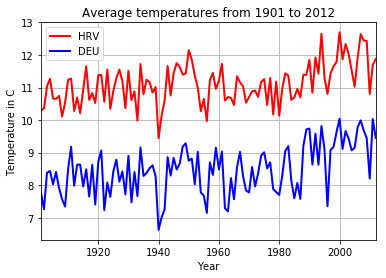

In [48]:
plt.figure()
plt.plot(temperatures_hrv[:, 0], temperatures_hrv[:, 1], label='HRV', color='r', linewidth=2)
plt.plot(temperatures_deu[:, 0], temperatures_deu[:, 1], label='DEU', color='b', linewidth=2)
plt.title("Average temperatures from 1901 to 2012")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2012])

plt.legend(loc='best')
plt.grid(True)
plt.show()

Finally, we can resize our plot by expanding it in horizontal direction `figsize=(10, 4)`:

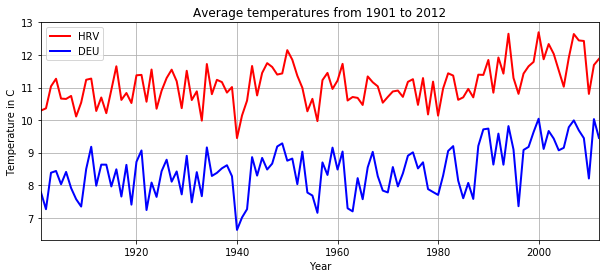

In [57]:
plt.figure(figsize=(10, 4))
plt.plot(temperatures_hrv[:, 0], temperatures_hrv[:, 1], label='HRV', color='r', linewidth=2)
plt.plot(temperatures_deu[:, 0], temperatures_deu[:, 1], label='DEU', color='b', linewidth=2)
plt.title("Average temperatures from 1901 to 2012")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2012])

plt.legend(loc='best')
plt.grid(True)
plt.show()

**Question  1**: From this plot, can you guess which country is placed more in the south and which one in the north? Check your guess by taking a look at a map of Europe.

**Question  2**: Is there anything odd about this plot? 

Seems like there is a dip in minimal temperature for both countries in 1940. A quick search in the Internet reveals that this was a weather anomaly, where all European countries experienced abnormally cold winters.

To save your figure, you can use `plt.savefig` function, which you have to insert before the last `plt.show()` line:

In [52]:
plt.savefig('temperatures_hrv_deu.pdf')

To save in another format (e.g. png, jpg) just replace **.pdf** with the desired extension.

Congratulations, you have completed the project! Feel free to explore more plotting examples in the [matplotlib gallery](http://matplotlib.org/gallery.html) and analyse more data. Exerises below demonstrate how to do a few more things with our data including saving results and writing Python code that downloads data for us.

## 2. Saving results

In this exercise we will see how to use `np.savetxt` to save the data. For a country of your choice extract the lowest, highest and the average temperature (including the year when those occurred). Create two lists, one containing the text (e.g. `text=['Lowest temp', 'Highest temp', 'Average']`) and another containing the values (`values`). Make sure the lists have the same length and use `np.column_stack` to stack the lists together: 
```python
table = np.column_stack((text, values))
print(table)
```
To save this into a file in the current directory use:
```python
np.savetxt('stats.txt', table, fmt="%s")
```
`np.savetxt` expect the file name as the first argument and the data as the second. `fmt` stands for format and indicates that we want to store strings (`%s`). After you have saved the file, open it in the editor to check what's inside!

## 3. More plotting

Pick a couple of [country codes](http://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code) from countries you have never heard of before and make their temperature plots (like we did for Canada). For that, you need to download the data by changing the country code in this link:
```
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv
```
Use a different color for every country, and make sure to include a legend so you can see which line represents which country. Can you try to guess their relative positions to each other on the Earth by looking at the plot?

## 4. Mini project: Getting the data from the Internet

Instead of manually downloading the data sets, we can fetch them directly from the Internet in our Python code! This is a very common practice in programming and is possible because the source of our data (in our case the World's Bank website) provides information on how to access their data. This is called Application Programming Interface (API). 

Let's write a Python script that fetches historical temperature values for Canada. For that, we will need another new library called `requests`, which knows how to deal with the content of a website. For this part of the exercise, create a new script called **climate_internet.py** and import the requests package (and numpy which we are going to use later):

In [58]:
import requests
import numpy as np

The following line will fetch the temperatures for Canada:

In [59]:
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv"
print("Getting the data from:", url)
resp = requests.get(url)

Getting the data from: http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv


What happened here? URL, also known as the link, is the text you usually write in your address bar in your browser to go to a certain website. For example, `https://www.google.ca/` is a valid URL and so is `https://www.youtube.com/watch?v=2XID_W4neJo`. Notice how the link to the youtube video is specified by a sequence of characters `2XID_W4neJo` after the equals sign `=` in the link (another video would have a different sequence of characters). 

Similarly, the link to our data set contains two pieces of information (tas and CAN) in the URL that specify:
`https://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv`

- tas: we want temperatures (for precipitation this would be `pr`)
- CAN: for Canada

To see the data we are downloading, open your web-browser and copy and paste the link stored in `url`. You can also get the data for other countries by replacing CAN with other country codes (e.g. DEU for Germany or GBR for the United Kingdom.)

Then, in the next line:
```python
resp = requests.get(url)
```
we have used function `get` from `requests` and gave it the link as a parameter. This function knows how to get the website content when we give it a URL. If everything went well, the function will store the data in the variable `resp`. There is a simple way to check if everything went well:

In [60]:
print("Response from the website (200 is OK):", resp.status_code)

Response from the website (200 is OK): 200


Status codes are messages exchanged among computers on the Web. Sometimes when you try to open a website in your browser you might get a message: `404 Page not found`. The 404 number is a status code meant to tell your web-browser "Hey, you requested something I don't have... here's a 404 for you". Here, we are all good  because 200 means "OK".

To access the data we have received from the website, we can look into the variable `resp.text`. Let's make sure that this is indeed text:

In [61]:
print("Type of the data we received:", type(resp.text))

Type of the data we received: <class 'str'>


Let's print first 100 characters to peek into the content:

In [62]:
print(resp.text[:100])

year,data
1901,-7.67241907119751
1902,-7.862711429595947
1903,-7.910782814025879
1904,-8.15572929382


If you are still skeptical (and in programming it's good to be skeptical!), there is an easy way to check that what we have have seen on the website is indeed what we have on our computer now. Go to the website:

```
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv
```

and compare the first few lines there and the first few lines in your code. Convinced now? Good! You can now use the `np.loadtxt` as before to load this data into a numpy array.

Now, instead of telling numpy to read a file stored on our computer, we will give it the text stored in the variable `resp.text`. There is a little catch to keep in mind here: we need to tell NumPy where new lines are in the text. To do this, we can split the text in `resp.text` into chunks where each chunk is a new row. In programming a new line is written as `\n`:

In [63]:
rows = resp.text.split('\n')
rows[:5]

['year,data',
 '1901,-7.67241907119751',
 '1902,-7.862711429595947',
 '1903,-7.910782814025879',
 '1904,-8.155729293823242']

Compare these numbers with the numbers from before. We should recognize that they are the same! The only difference is how we organized the data: now, we have a list where every element is a row from our `resp.text` and before we had one large string. `np.loadtxt` will now know how to read this and store it into an array:

In [64]:
temperatures = np.loadtxt(rows, delimiter=',', skiprows=1)

#### 4. 1. Creating functions

Write a function which takes a [three-letter country code](http://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code) as input and returns a variable containing the csv data that can be loaded using `numpy.loadtxt`. Rewrite your code to use this function every time the temperature data is requested.

#### 4. 2. Re-plot
Rewrite your code for Exercise 2 "More plotting" to use functions to download the files from the internet!

#### 4. 3. Function for precipitation data

Write a new function that returns the precipitation data! For that you will need to change **tas** in the following url to **pr**:

```
https://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv
```